In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
# Load the Datafrom CSV
df=pd.read_csv("/home/sathish/Downloads/fuel_economy_data.csv.csv")

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
columns_to_impute=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
for i in columns_to_impute:
    print("how many unique value for ",i," : ",df[i].nunique())

how many unique value for  mpg  :  129
how many unique value for  cylinders  :  5
how many unique value for  displacement  :  82
how many unique value for  horsepower  :  94
how many unique value for  weight  :  351
how many unique value for  acceleration  :  95
how many unique value for  model year  :  13
how many unique value for  origin  :  3
how many unique value for  car name  :  305


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['horsepower'] = label_encoder.fit_transform(df['horsepower'])
df['car name'] = label_encoder.fit_transform(df['car name'])

In [11]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,15,3504,12.0,70,1,49
1,15.0,8,350.0,33,3693,11.5,70,1,36
2,18.0,8,318.0,27,3436,11.0,70,1,231
3,16.0,8,304.0,27,3433,12.0,70,1,14
4,17.0,8,302.0,22,3449,10.5,70,1,161
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,80,2790,15.6,82,1,153
394,44.0,4,97.0,51,2130,24.6,82,2,301
395,32.0,4,135.0,78,2295,11.6,82,1,119
396,28.0,4,120.0,73,2625,18.6,82,1,159


In [12]:
x=df[['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']]

<Axes: >

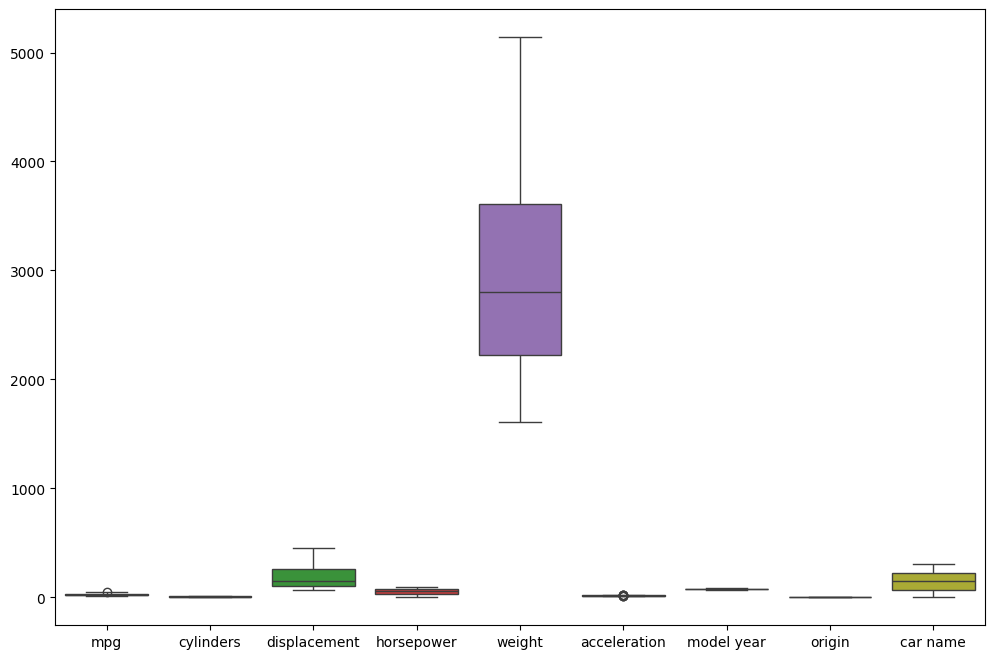

In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.boxplot(x)

            

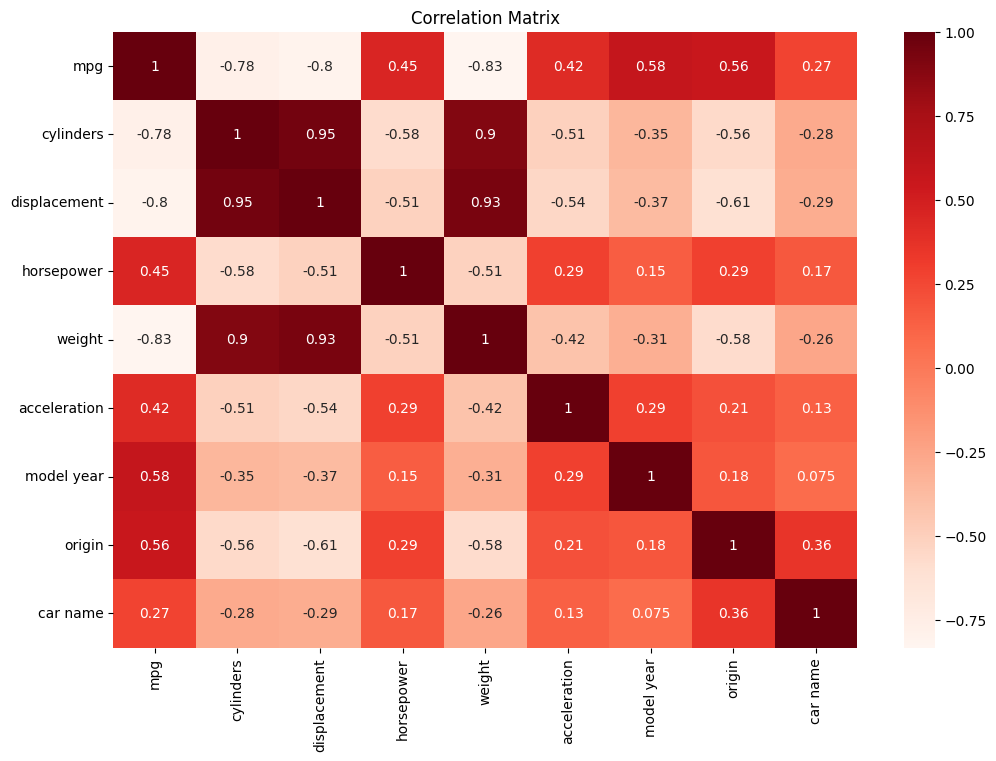

In [15]:
correlation_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

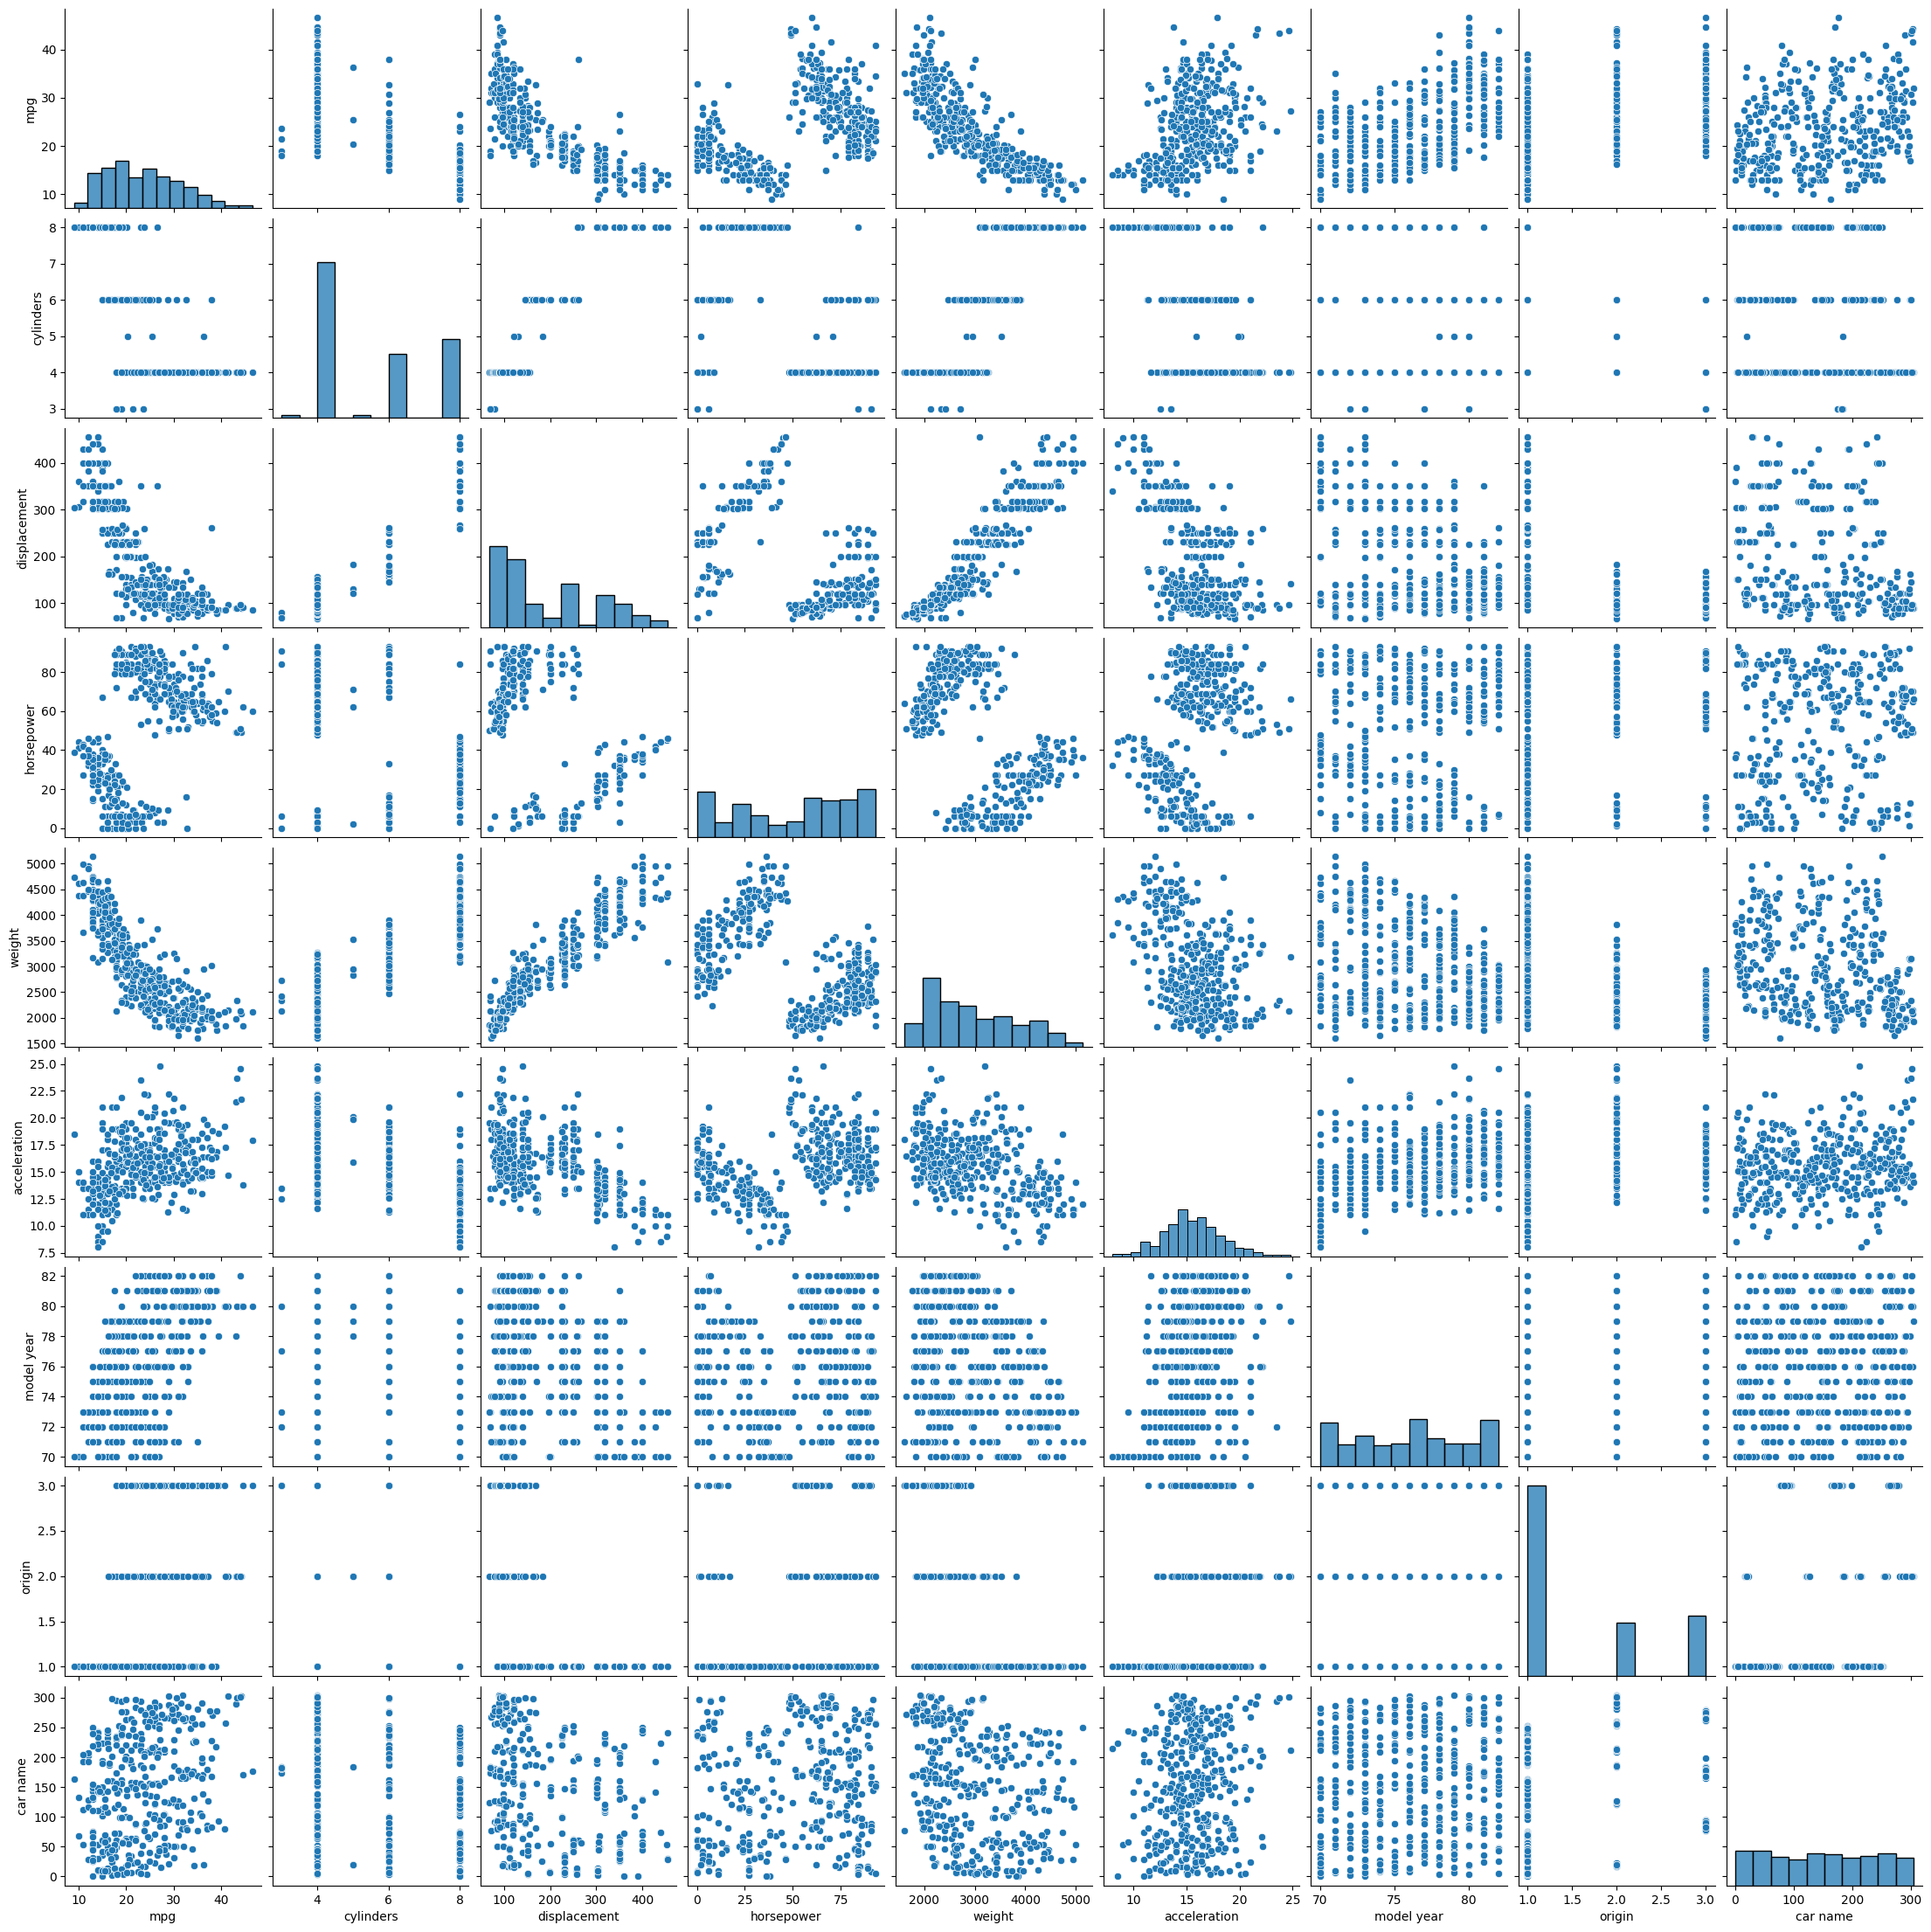

In [16]:
sns.pairplot(df)

In [17]:
x=df[['cylinders','displacement','weight']]
y=df['mpg']


In [18]:
x

,cylinders,displacement,weight
0,8,307.0,3504
1,8,350.0,3693
2,8,318.0,3436
3,8,304.0,3433
4,8,302.0,3449
...,...,...,...
393,4,140.0,2790
394,4,97.0,2130
395,4,135.0,2295
396,4,120.0,2625


In [19]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [20]:
# splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
x_train

,cylinders,displacement,weight
3,8,304.0,3433
18,4,97.0,2130
376,4,91.0,2025
248,4,91.0,1800
177,4,115.0,2694
...,...,...,...
71,3,70.0,2330
106,8,350.0,4499
270,4,134.0,2515
348,4,89.0,2050


In [22]:
y_train

3      16.0
18     27.0
376    37.0
248    36.1
177    23.0
       ... 
71     19.0
106    12.0
270    21.1
348    37.7
102    26.0
Name: mpg, Length: 318, dtype: float64

In [23]:
# building the linear regression model
model1=LinearRegression()

#fitting the model on the training data
model1.fit(x_train,y_train)

LinearRegression()

In [24]:
# model evaluation
y_pred=model1.predict(x_test)

In [27]:
y_pred_train=model1.predict(x_train)

In [25]:
y_pred

array([32.14779613, 26.9307627 , 24.77836797, 15.68183509, 13.99082781,
       30.30958683, 25.22544883,  9.08845707, 15.98124552, 23.94835316,
       14.97442551, 31.17987951, 31.23681578, 16.19231954, 27.06449042,
        8.80156261, 27.3509814 , 23.06640214, 12.69836177, 31.15141137,
       27.56289404, 24.22136984, 23.6339489 , 30.43498534, 18.3506204 ,
       30.13877802, 29.35319618, 25.75078839, 19.91961691,  8.79253351,
       25.65247087, 30.85728476, 15.36743083, 29.02504651, 30.95713447,
       12.36813139, 27.00528245, 18.83430128, 12.50479111, 29.61510303,
       25.40217644, 31.82409167, 25.16018336, 11.12706571, 27.60830434,
       29.57829936, 29.15641608, 26.65191368, 28.62524418, 29.72786586,
       27.82743647, 31.20765407, 29.05837599, 11.54824908, 25.25983576,
       11.30911673, 14.97026407, 26.20392042, 28.64731878, 21.309978  ,
       16.71112686, 32.14779613, 26.51220858, 24.91521867, 23.81712231,
       29.30972788, 25.09602126, 30.60579416, 29.92825252, 14.96

In [28]:
y_pred_train

array([18.80569443, 30.13877802, 30.83826188, 32.119328  , 26.62261326,
       11.75891328, 31.28625514, 28.69842905, 29.29042756,  8.03930381,
       12.10053091, 29.04687932, 29.65745528, 32.18029332, 24.38065902,
       30.03170881, 27.24599292, 21.31650391, 25.32445993, 14.90180817,
       32.00073283, 28.534701  , 24.54035168, 17.44491753, 19.77616652,
       11.49686138, 31.81839804, 10.8182227 , 29.66162305, 31.22459624,
       32.25320076, 28.06768486, 18.45325073, 31.17987951, 26.65760731,
       27.82743647, 29.81979618, 20.76338979, 30.24043102, 21.52912279,
       12.29287214, 27.86729186, 25.5881178 , 22.35413754, 25.25774871,
       24.34816183, 31.06600696, 24.55512668, 30.15030398, 26.87382643,
       31.19668296, 31.09905901, 30.45595657, 21.49314507, 27.27724168,
       20.379691  , 21.15513402, 32.51649476, 30.5716324 , 29.51386617,
       20.67006599, 11.97875798, 14.47367008, 21.48994831, 22.2105421 ,
       30.88297861, 29.43276824, 30.73219298, 28.74730721, 27.40

In [26]:
#mean squared error and R-squared for model evaluation
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [30]:
r12=r2_score(y_train,y_pred_train)

In [33]:
print("test r2 value : ",r2)
print("train r2 value : ",r12)

test r2 value :  0.7219924560018649
train r2 value :  0.6923121254887978


In [34]:
mse12=mean_squared_error(y_train,y_pred_train)
print("train MSE value : ",mse12)

train MSE value :  19.290867428461848


In [35]:
print(" test Mean Squred Error :",mse)
print("train MSE value : ",mse12)
print("test r2 value : ",r2)
print("train r2 value : ",r12)

 test Mean Squred Error : 14.947476976451384
train MSE value :  19.290867428461848
test r2 value :  0.7219924560018649
train r2 value :  0.6923121254887978


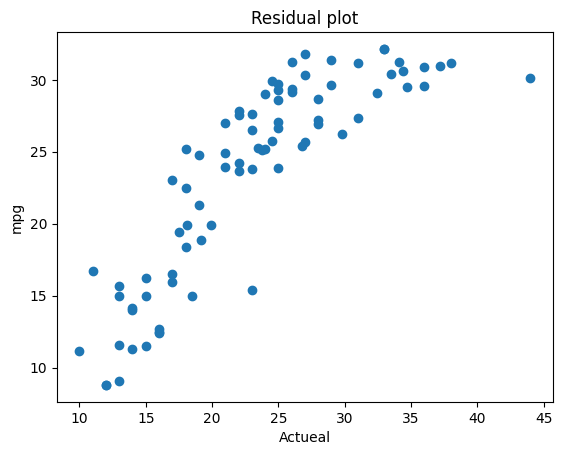

In [36]:
# predicttion and visualization 
# to visualize the prediction against actual prices weell use a scatter plot
plt.scatter(y_test,y_pred)
plt.xlabel("Actueal")
plt.ylabel("mpg")
plt.title("Residual plot")
plt.show()

In [37]:
# lastly, lets use the trained model to make predictions on new data and visualize the results
new_data=[[8,304.0,3433]]
predicted_price=model1.predict(new_data)
print("predicted price:",predicted_price[0])

predicted price: 18.80569442861701


/home/sathish/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
# lastly, lets use the trained model to make predictions on new data and visualize the results
new_data=[[4,134.0,2515]]
predicted_price=model1.predict(new_data)
print("predicted price:",predicted_price[0])


predicted price: 27.31987135669458


/home/sathish/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
# lastly, lets use the trained model to make predictions on new data and visualize the results
new_data=[[6,289.0,3515]]
predicted_price=model1.predict(new_data)
print("predicted price:",predicted_price[0])


predicted price: 18.796578874133033


/home/sathish/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
from sklearn.metrics import mean_absolute_error

In [42]:
mae1=mean_absolute_error(y_test,y_pred)
print('Test  MAE is : ',mae1)

Test  MAE is :  3.1092532313465484


In [43]:
mae12=mean_absolute_error(y_train,y_pred_train)
print('Train MAE is : ',mae12)

Train MAE is :  3.3309818804008717


In [44]:
g1=df['mpg'].mean()

In [45]:
g1

23.514572864321607

In [46]:
MAE1=mae1/g1*100
MAE1

13.222665150189409

In [47]:
import numpy as np

In [48]:
rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
print('Test RMSE is : ',rmse1)

Test RMSE is :  3.8661967069009027


In [49]:
rmse1=np.sqrt(mean_squared_error(y_train,y_pred_train))
print('Train RMSE is : ',rmse1)

Train RMSE is :  4.392137000192713


In [50]:
n1=len(y_test)
k1=x_test.shape[1]
adjusted_r21=1-(1-r2)*(n1-1)/(n1-k1-1)
print('The adjusted R2 is : ',adjusted_r21)

The adjusted R2 is :  0.7110184740019385


In [51]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [52]:
ridge=Ridge()
parameter=[{'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,50]}]
ridge_regressor=GridSearchCV(ridge,parameter,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                    20, 30, 50]}],
             scoring='neg_mean_squared_error')

In [53]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
-19.746828286775333


In [54]:
y_pred=ridge_regressor.predict(x_test)
from sklearn.metrics import r2_score
r2_score1=r2_score(y_test,y_pred)
print(r2_score1)

0.7217028650267198


In [105]:
ridge=Ridge(alpha=50)
ridge.fit(x,y)

Ridge(alpha=50)

In [60]:
y1_train_pred_ridge=ridge.predict(x_train)
y1_test_pred_ridge=ridge.predict(x_test)

In [61]:
print(y1_train_pred_ridge)
print(y1_test_pred_ridge)

[18.87586389 29.95506689 30.64497535 31.94415349 26.44758438 12.04089158
 31.05712857 28.49759808 29.09472226  8.36277359 12.38733909 28.82449567
 29.52857785 31.96705102 24.17822901 29.87243708 27.14466042 21.31406301
 25.26408738 14.96220159 31.84659061 28.36399666 24.47967766 17.495848
 19.81358671 11.90490052 31.65843378 10.92469406 29.49711895 31.01730693
 32.01503608 27.88713358 18.3984039  30.99142286 26.50253806 27.75054528
 29.62833107 20.73366396 30.03869222 21.3090861  12.42019244 27.79096415
 25.54550149 22.26579846 25.20721742 24.1842021  30.87594036 24.4676564
 29.96999997 26.71856999 31.00197559 30.88350654 30.23780005 21.49644571
 27.10822394 20.42564396 21.23800353 32.31449404 30.39728522 29.35376134
 20.72012434 11.94591831 14.63506716 21.55159835 22.22398546 30.67085943
 29.23907539 30.53363668 28.62502677 27.2521788  11.4672615  15.20670554
 25.27169144 28.29470716 17.0241608  29.86845502  8.50712705 29.04275514
 19.1746502  30.79231503 23.22124194 18.87200706 29.71

In [62]:
print('Ridge Regression')
print('Training set R2 : ',r2_score(y_train,y1_train_pred_ridge))
print('Test set R2 :',r2_score(y_test,y1_test_pred_ridge))
print('Test set MSE : ',mean_squared_error(y_test,y1_test_pred_ridge))

Ridge Regression
Training set R2 :  0.6919076479950519
Test set R2 : 0.7265020930645871
Test set MSE :  14.705009828985613


In [63]:
from sklearn.linear_model import Lasso

In [64]:
para={'alpha':[1e-20,1e-17,1e-15,1e-10,1e-8,1e-3,1e-2,1,2,5,8,10,15,20]}
lasso=Lasso()
lasso_cv=GridSearchCV(lasso,para,scoring='neg_mean_squared_error',cv=5)
lasso_cv.fit(x_train,y_train)

/home/sathish/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.461e+03, tolerance: 1.571e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/sathish/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.528e+03, tolerance: 1.657e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-20, 1e-17, 1e-15, 1e-10, 1e-08, 0.001,
                                   0.01, 1, 2, 5, 8, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [65]:
print('Best alpha for lasso: ',lasso_cv.best_params_)
print("Best score",lasso_cv.best_score_)

Best alpha for lasso:  {'alpha': 1}
Best score -19.7293912732274


In [66]:
lasso.fit(x_train,y_train)

Lasso()

In [67]:
y_pred=lasso.predict(x_test)

In [68]:
y_pred

array([32.18585706, 26.87604635, 24.82834658, 15.75406243, 14.03895541,
       30.31763794, 25.1337215 ,  8.98920268, 16.09459129, 24.00683441,
       14.99082457, 31.20414597, 31.26189368, 16.28071729, 26.99897256,
        8.73443544, 27.30733682, 23.13582269, 12.67596937, 31.17527212,
       27.51655127, 24.28501278, 23.66761759, 30.44418822, 18.46787151,
       30.1443948 , 29.34698172, 25.659559  , 19.88383048,  8.7144764 ,
       25.56682933, 30.86805855, 15.4148456 , 29.00462485, 30.98140328,
       12.34103265, 27.13592169, 18.9597164 , 12.53174015, 29.61262119,
       25.49853207, 31.85372705, 25.07959786, 11.10769437, 27.56324411,
       29.56131491, 29.13596055, 26.59258789, 28.60484296, 29.73207402,
       27.77279189, 31.23549321, 29.04224153, 11.50946561, 25.35416279,
       11.26692523, 15.00566486, 26.12995018, 28.60435892, 21.31497372,
       16.77769158, 32.18585706, 26.43881976, 24.83177738, 23.87500403,
       29.2933634 , 24.99546032, 30.61743136, 29.9302336 , 15.03

In [69]:
y_pred_train=lasso.predict(x_train)

In [70]:
y_pred_train

array([18.93133722, 30.1443948 , 30.85765971, 32.1569832 , 26.56668209,
       11.72313214, 31.32029741, 28.68288304, 29.28395391,  7.93208623,
       12.06961841, 28.9508239 , 29.64414041, 32.2264418 , 24.47325754,
       30.03071674, 27.18623862, 21.31778043, 25.22397778, 14.96291879,
       32.03225027, 28.51046792, 24.60790528, 17.55116693, 19.74341861,
       11.43193085, 31.84795228, 10.8008035 , 29.65535662, 31.2533122 ,
       32.30547123, 28.03743136, 18.59737921, 31.20414597, 26.59836266,
       27.77279189, 29.8215023 , 20.76059569, 30.25130874, 21.57663449,
       12.29646921, 27.81321528, 25.66996849, 22.3898985 , 25.33552644,
       24.4326728 , 31.08865055, 24.44685707, 30.15544967, 26.81829864,
       31.22245964, 31.12725659, 30.4737181 , 21.49630366, 27.23127545,
       20.35554435, 21.13695581, 32.56616394, 30.58278273, 29.50422322,
       20.65005767, 12.00837603, 14.50771186, 21.48162471, 22.22392481,
       30.90682593, 29.42832319, 30.66015615, 28.71720898, 27.35

In [71]:
print('Lasso regression')
print('Training Date R2 : ',r2_score(y_train,y_pred_train))
print('Test Date R2 :',r2_score(y_test,y_pred))
print('Test set MSE :',mean_squared_error(y_test,y_pred))

Lasso regression
Training Date R2 :  0.6922599871130606
Test Date R2 : 0.7215195827910417
Test set MSE : 14.972901687341997


In [72]:
x1=df[['cylinders','displacement','weight','model year','origin']]
y1=df['mpg']


In [73]:
x1

,cylinders,displacement,weight,model year,origin
0,8,307.0,3504,70,1
1,8,350.0,3693,70,1
2,8,318.0,3436,70,1
3,8,304.0,3433,70,1
4,8,302.0,3449,70,1
...,...,...,...,...,...
393,4,140.0,2790,82,1
394,4,97.0,2130,82,2
395,4,135.0,2295,82,1
396,4,120.0,2625,82,1


In [74]:
y1

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [75]:
# splitting the dataset into training and testing sets
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [76]:
x1_train

,cylinders,displacement,weight,model year,origin
3,8,304.0,3433,70,1
18,4,97.0,2130,70,3
376,4,91.0,2025,82,3
248,4,91.0,1800,78,3
177,4,115.0,2694,75,2
...,...,...,...,...,...
71,3,70.0,2330,72,3
106,8,350.0,4499,73,1
270,4,134.0,2515,78,3
348,4,89.0,2050,81,3


In [77]:
y1_train

3      16.0
18     27.0
376    37.0
248    36.1
177    23.0
       ... 
71     19.0
106    12.0
270    21.1
348    37.7
102    26.0
Name: mpg, Length: 318, dtype: float64

In [78]:
# building the linear regression model
model2=LinearRegression()

#fitting the model on the training data
model2.fit(x1_train,y1_train)

LinearRegression()

In [79]:
# model evaluation
y2_pred=model2.predict(x1_test)

In [80]:
y2_pred_train=model2.predict(x1_train)

In [81]:
y2_pred

array([32.47192414, 29.61253546, 21.27534815, 16.99058199, 12.54719202,
       27.20825767, 28.14854467, 10.13616726, 16.54215384, 21.83875049,
       13.28054283, 36.20263803, 24.96541735, 13.95351819, 23.82439171,
        6.5816441 , 29.88768802, 24.19510289, 16.55236013, 36.16889414,
       23.44052042, 18.85462352, 28.861855  , 29.08807066, 14.96939923,
       33.95495582, 25.73464753, 25.01278049, 21.93173442,  8.67069467,
       28.65470298, 35.02955878, 19.94868144, 26.13154792, 34.17327306,
       12.90892698, 23.39514625, 21.99098918, 12.4117631 , 26.85809231,
       26.87457528, 27.00958284, 20.59253629,  7.88415427, 24.64732717,
       35.11241434, 26.81601955, 24.79971905, 22.5999937 , 27.58181188,
       22.28972487, 33.65721826, 32.50785595, 11.124102  , 28.33185787,
       10.02765233, 19.75658824, 29.87683695, 23.26154883, 20.22112181,
       16.66338686, 31.65892312, 23.9827613 , 20.27430673, 20.81446335,
       25.65598578, 25.04967209, 32.54253804, 27.67442844, 12.58

In [82]:
y2_pred_train

array([15.42520507, 25.37979232, 35.79771138, 34.06418227, 24.59778242,
       11.37380677, 32.71444315, 30.28169756, 26.8132275 ,  8.58603884,
       15.84373848, 31.44516348, 26.59691096, 31.80818368, 25.11269227,
       32.87013738, 30.40420008, 23.64806738, 27.08578583, 12.81399542,
       31.7569855 , 26.22399345, 19.26058718, 15.43824926, 19.09975495,
       10.55189713, 26.18983305, 10.4914031 , 32.79931448, 35.2754345 ,
       30.41350642, 26.90071595, 21.29335019, 36.20263803, 26.87762323,
       23.10272588, 25.41898203, 22.82524321, 31.46923804, 22.37293295,
       13.0523375 , 23.96296833, 20.53039438, 23.20109683, 20.11093316,
       29.47359015, 35.25466147, 27.66054227, 32.81563685, 31.09374398,
       34.54081809, 29.37989005, 33.55134851, 20.63330755, 23.71985769,
       20.62812638, 21.77021712, 36.69527851, 29.25004132, 33.86075917,
       16.90730897, 10.52936058, 18.91715548, 21.13113699, 22.29665454,
       28.44380547, 24.98809728, 27.75179454, 27.75645469, 26.81

In [85]:
#mean squared error and R-squared for model evaluation
mse2=mean_squared_error(y1_test,y2_pred)
mse22=mean_squared_error(y1_train,y2_pred_train)
r21=r2_score(y1_test,y2_pred)
r22=r2_score(y1_train,y2_pred_train)

In [86]:
mae2=mean_absolute_error(y1_test,y2_pred)
mae22=mean_absolute_error(y1_train,y2_pred_train)
print('The MAE is : ',mae2)

The MAE is :  2.2464032853290887


In [87]:
r21

0.843529486321717

In [88]:
print(" test Mean Squred Error :",mse2)
print("train Mean Squred Error :",mse22)
print('test  MAE is : ',mae2)
print('Train MAE is : ',mae22)
print("test R-squared:",r21)
print("train R-squared:",r22)

 test Mean Squred Error : 8.412863072217013
train Mean Squred Error : 11.765007975499286
test  MAE is :  2.2464032853290887
Train MAE is :  2.5901507773473016
test R-squared: 0.843529486321717
train R-squared: 0.812349013800809


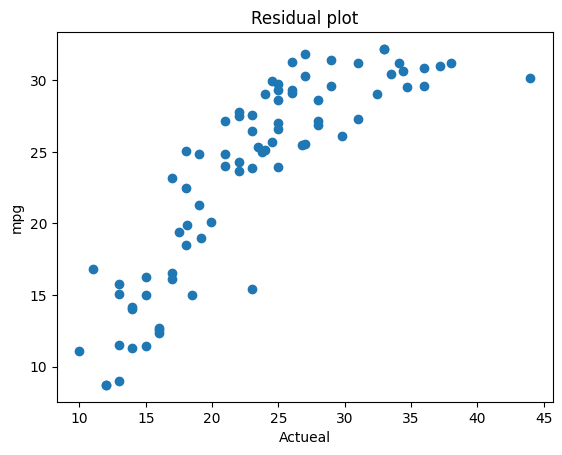

In [89]:
# predicttion and visualization 
# to visualize the prediction against actual prices weell use a scatter plot
plt.scatter(y_test,y_pred)
plt.xlabel("Actueal")
plt.ylabel("mpg")
plt.title("Residual plot")
plt.show()

In [90]:
# lastly, lets use the trained model to make predictions on new data and visualize the results
new_data2=[[8,304.0,3433,70,1]]
predicted_mpg2=model2.predict(new_data2)
print("predicted price:",predicted_mpg2[0])

predicted price: 15.425205065470934


/home/sathish/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [91]:
# lastly, lets use the trained model to make predictions on new data and visualize the results
new_data2=[[3,70.0,2330,72,3]]
predicted_mpg2=model2.predict(new_data2)
print("predicted price:",predicted_mpg2[0])

predicted price: 25.548545353470665


/home/sathish/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [92]:
# lastly, lets use the trained model to make predictions on new data and visualize the results
new_data2=[[6,79.0,3330,79,2]]
predicted_mpg2=model2.predict(new_data2)
print("predicted price:",predicted_mpg2[0])

predicted price: 23.07182974875976


/home/sathish/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [93]:
from sklearn.metrics import mean_absolute_error
import numpy as np

In [94]:
rmse2=np.sqrt(mean_squared_error(y1_test,y2_pred))
rmse22=np.sqrt(mean_squared_error(y1_train,y2_pred_train))
print('Test RMSE is : ',rmse2)
print('Train RMSE is : ',rmse22)

Test RMSE is :  2.900493591135311
Train RMSE is :  3.4300157398325863


In [95]:
n2=len(y1_test)
k2=x1_test.shape[1]
adjusted_r22=1-(1-r21)*(n2-1)/(n2-k2-1)
print('The adjusted R2 is : ',adjusted_r22)

The adjusted R2 is :  0.8329571543164276


In [96]:
g2=df['mpg'].mean()

In [97]:
g2

23.514572864321607

In [98]:
MAE2=mae2/g2*100
MAE2

9.553238743866494

In [102]:
ridge2=Ridge()
parameter2=[{'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,50]}]
ridge_regressor2=GridSearchCV(ridge2,parameter2,scoring='neg_mean_squared_error',cv=5)
ridge_regressor2.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                    20, 30, 50]}],
             scoring='neg_mean_squared_error')

In [103]:
print(ridge_regressor2.best_params_)
print(ridge_regressor2.best_score_)

{'alpha': 30}
-12.272606614078333


In [106]:
ridge2=Ridge(alpha=30)
ridge2.fit(x1,y1)

Ridge(alpha=30)

In [107]:
y2_train_pred_ridge=ridge2.predict(x1_train)
y2_test_pred_ridge=ridge2.predict(x1_test)

In [108]:
print(y2_train_pred_ridge)
print(y2_test_pred_ridge)

[15.57341622 25.51568112 35.34728062 33.78264215 24.6926363  11.66907954
 32.42831164 30.15261233 26.82067896  8.93206113 15.89732587 31.25853183
 26.73989749 31.67204956 24.79658228 32.68234174 30.30108278 23.57138193
 27.13601946 12.94817093 31.71772496 26.25831282 19.51496455 15.51334804
 19.26222337 11.00027787 26.41473467 10.63887779 32.54916266 34.85801774
 30.29167759 26.91467766 20.97137283 35.74683196 26.90648895 23.46988736
 25.57944588 22.74909187 31.28544157 22.13213956 13.12934674 24.28224068
 20.76964678 23.11313942 20.35402237 28.93801959 34.84790918 27.62154967
 32.61644452 30.79243908 34.17654862 29.29255968 33.19328823 20.74425226
 23.89757358 20.7338364  21.87461775 36.25208782 29.28052952 33.50021386
 17.24476005 10.59322169 18.77216357 21.26663926 22.34904907 28.498957
 25.15601248 27.86947879 27.84832477 26.78791821 10.85238636 19.43142328
 25.96402528 26.94414155 15.45141881 33.07318327  8.35939487 25.99500726
 19.41963284 31.84143651 24.69739563 17.91746352 29.0

In [109]:
print('Ridge Regression')
print('Training set R2 : ',r2_score(y1_train,y2_train_pred_ridge))
print('Test set R2 :',r2_score(y1_test,y2_test_pred_ridge))
print('Test set MSE : ',mean_squared_error(y1_test,y2_test_pred_ridge))

Ridge Regression
Training set R2 :  0.8116327924467438
Test set R2 : 0.8495969124775519
Test set MSE :  8.086639145102035


In [110]:
para2={'alpha':[1e-20,1e-17,1e-15,1e-10,1e-8,1e-3,1e-2,1,2,5,8,10,15,20]}
lasso2=Lasso()
lasso_cv2=GridSearchCV(lasso2,para2,scoring='neg_mean_squared_error',cv=5)
lasso_cv2.fit(x1_train,y1_train)

/home/sathish/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.548e+03, tolerance: 1.571e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/sathish/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.522e+03, tolerance: 1.657e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-20, 1e-17, 1e-15, 1e-10, 1e-08, 0.001,
                                   0.01, 1, 2, 5, 8, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [111]:
print('Best alpha for lasso: ',lasso_cv2.best_params_)
print("Best score",lasso_cv2.best_score_)

Best alpha for lasso:  {'alpha': 0.01}
Best score -12.313251930050118


In [112]:
lasso2.fit(x1_train,y1_train)

Lasso()

In [113]:
y_pred2=lasso2.predict(x1_test)

In [114]:
y_pred_train2=lasso2.predict(x1_train)

In [115]:
y_pred2

array([31.5463831 , 30.18710227, 22.20374283, 16.87061368, 12.73208398,
       26.63727939, 28.54978054,  9.26422446, 16.82276675, 22.7391525 ,
       13.14707921, 34.66699369, 26.90984192, 14.36150017, 25.03914692,
        6.40658097, 30.53156415, 23.82828453, 15.62041797, 34.6332473 ,
       23.84233205, 20.17904639, 28.67178241, 30.36179322, 15.55493336,
       33.54811427, 26.23410501, 25.82716155, 21.92287861,  8.14508761,
       29.05597643, 34.55350809, 19.24658697, 25.4219119 , 32.88424372,
       12.38363452, 24.78714392, 21.78052644, 12.39318493, 27.25590314,
       27.50055096, 27.72125615, 20.99413651,  8.01012346, 23.87695318,
       33.32551679, 27.05792723, 24.89644145, 23.35244193, 27.94723531,
       23.80955627, 32.46988066, 31.03681961, 10.70040709, 28.75448164,
        9.70560607, 18.96786838, 28.17175525, 24.78145238, 20.80314587,
       16.57142876, 30.83505178, 25.09579822, 20.68454444, 21.83384159,
       25.0480445 , 25.76232584, 33.40959687, 29.04977611, 12.96

In [116]:
y_pred_train2

array([16.03675637, 25.01213838, 34.26203698, 32.93529935, 24.74645651,
       10.9501304 , 31.6980545 , 31.14858857, 26.14048985,  7.80925321,
       14.91174372, 30.19177894, 26.94053241, 32.065733  , 23.82909358,
       33.5748627 , 30.84890896, 23.77145899, 27.55182508, 13.10063722,
       32.92917614, 25.45593981, 20.57637908, 15.84634145, 19.46516794,
        9.9851753 , 27.00317555, 10.2972568 , 32.42482828, 33.89341805,
       29.86449492, 27.01711985, 21.31022792, 34.66699369, 27.74851602,
       24.52088759, 26.03746834, 23.00054042, 31.41936876, 22.00597933,
       12.75665127, 25.27946386, 21.83761942, 23.69467981, 21.42678818,
       27.57773162, 33.8206768 , 27.96646967, 33.58098591, 29.40827816,
       33.2258327 , 28.72686847, 32.27093412, 21.15473442, 24.08058781,
       20.89192279, 21.9648094 , 35.34801191, 30.52377591, 32.28809322,
       17.67947938, 10.75095053, 18.20632333, 21.49670078, 22.71647484,
       29.93180472, 25.59789049, 27.21024613, 28.82221169, 25.74

In [117]:
print('Lasso regression')
print('Training Date R2 : ',r2_score(y1_train,y_pred_train2))
print('Test Date R2 :',r2_score(y1_test,y_pred2))
print('Test set MSE :',mean_squared_error(y1_test,y_pred2))

Lasso regression
Training Date R2 :  0.8020665114207839
Test Date R2 : 0.8306038857715194
Test set MSE : 9.107826647134178


In [118]:
x2=df[['cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']]
y2=df['mpg']


In [119]:
# splitting the dataset into training and testing sets
x3_train,x3_test,y3_train,y3_test=train_test_split(x2,y2,test_size=0.2,random_state=42)

In [120]:
x3_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
3,8,304.0,27,3433,12.0,70,1,14
18,4,97.0,82,2130,14.5,70,3,95
376,4,91.0,63,2025,18.2,82,3,179
248,4,91.0,55,1800,16.4,78,3,171
177,4,115.0,89,2694,15.0,75,2,17
...,...,...,...,...,...,...,...,...
71,3,70.0,91,2330,13.5,72,3,183
106,8,350.0,37,4499,12.5,73,1,207
270,4,134.0,89,2515,14.8,78,3,265
348,4,89.0,57,2050,17.3,81,3,278


In [121]:
y3_train

3      16.0
18     27.0
376    37.0
248    36.1
177    23.0
       ... 
71     19.0
106    12.0
270    21.1
348    37.7
102    26.0
Name: mpg, Length: 318, dtype: float64

In [122]:
# building the linear regression model
model3=LinearRegression()

#fitting the model on the training data
model3.fit(x3_train,y3_train)

LinearRegression()

In [123]:
# model evaluation
y3_pred=model3.predict(x3_test)

In [124]:
y3_pred

array([32.47881598, 29.86323288, 20.3589916 , 17.50652942, 13.07662765,
       27.73000505, 28.12533591,  9.99736838, 17.1866843 , 22.41033065,
       12.48849666, 35.90142524, 25.79464797, 13.25531074, 23.53867657,
        6.38511807, 30.28291759, 24.31059631, 17.16152484, 36.23963927,
       24.21429827, 19.58406659, 28.76112918, 28.85870291, 14.44986531,
       35.45592556, 25.46330702, 25.56884016, 21.18892337,  8.70923809,
       28.5930815 , 35.51977999, 20.04818233, 26.61133512, 33.5939907 ,
       13.38104154, 23.21180168, 21.68238803, 12.87361459, 26.19098149,
       26.65412205, 27.91480489, 20.53943059,  8.1089201 , 25.02155646,
       35.08270805, 26.35837884, 24.51978472, 23.2735267 , 28.08748313,
       22.28906745, 33.38987625, 32.45452642, 11.05806702, 27.30090034,
       10.63241999, 19.60310173, 30.26854141, 22.97491155, 21.06403349,
       17.01840864, 31.70230932, 24.16223872, 20.82265243, 21.57098243,
       25.96746923, 25.52981624, 32.35796571, 27.85496854, 12.14

In [125]:
# model evaluation
y3_pred_train=model3.predict(x3_train)

In [126]:
y3_pred_train

array([14.80932037, 24.82429398, 35.93168475, 33.97499525, 23.74017228,
       12.04949636, 32.90775143, 30.55013034, 27.56192   ,  8.96016859,
       15.71702855, 30.30330305, 26.76963267, 32.41183069, 25.2698733 ,
       32.96119173, 30.15126019, 24.03284086, 26.27898942, 13.38247349,
       31.4772995 , 25.87149536, 18.99394642, 14.63219315, 18.66634114,
       10.9563735 , 27.2225905 , 10.08490105, 33.08328061, 35.05136409,
       31.30157062, 26.59720975, 20.92249804, 35.99090635, 26.00896164,
       23.24794167, 25.99336056, 22.56716973, 30.98888269, 22.30055933,
       12.70285696, 24.00966106, 20.99687322, 23.34307958, 19.77219866,
       29.33550241, 35.12827513, 27.29851038, 33.05701701, 31.21637682,
       35.15963844, 29.14352219, 33.2685256 , 20.52696987, 22.75368163,
       20.03560471, 21.90061672, 36.51397342, 28.78216993, 33.55857509,
       17.40592424, 10.65511509, 19.10303913, 21.98815492, 22.2709041 ,
       28.52082419, 26.34693493, 27.27440896, 28.12076156, 26.53

In [127]:
# mean squred error and r-squared for model evaluation
mse3=mean_squared_error(y3_test,y3_pred)
r23=r2_score(y3_test,y3_pred)
print("Mean squared error :",mse3)
print("R_squared",r23)

Mean squared error : 8.110244603003146
R_squared 0.8491578754824538


In [128]:
mae3=mean_absolute_error(y3_test,y3_pred)
print('The MAE is : ',mae3)

The MAE is :  2.2597939092097095


In [129]:
rmse3=np.sqrt(mean_squared_error(y3_test,y3_pred))
print('The RMSE is : ',rmse3)

The RMSE is :  2.8478491187215567


In [130]:
from sklearn.model_selection import train_test_split
import joblib
from IPython.display import FileLink

In [133]:
joblib.dump(model2,'model_saved2')

['model_saved2']

In [135]:
loaded_model2=joblib.load('model_saved2')

In [137]:
loaded_model2.predict(x1_test)

array([32.47192414, 29.61253546, 21.27534815, 16.99058199, 12.54719202,
       27.20825767, 28.14854467, 10.13616726, 16.54215384, 21.83875049,
       13.28054283, 36.20263803, 24.96541735, 13.95351819, 23.82439171,
        6.5816441 , 29.88768802, 24.19510289, 16.55236013, 36.16889414,
       23.44052042, 18.85462352, 28.861855  , 29.08807066, 14.96939923,
       33.95495582, 25.73464753, 25.01278049, 21.93173442,  8.67069467,
       28.65470298, 35.02955878, 19.94868144, 26.13154792, 34.17327306,
       12.90892698, 23.39514625, 21.99098918, 12.4117631 , 26.85809231,
       26.87457528, 27.00958284, 20.59253629,  7.88415427, 24.64732717,
       35.11241434, 26.81601955, 24.79971905, 22.5999937 , 27.58181188,
       22.28972487, 33.65721826, 32.50785595, 11.124102  , 28.33185787,
       10.02765233, 19.75658824, 29.87683695, 23.26154883, 20.22112181,
       16.66338686, 31.65892312, 23.9827613 , 20.27430673, 20.81446335,
       25.65598578, 25.04967209, 32.54253804, 27.67442844, 12.58